# Ford Go-bike Exploratory Analysis
## 1. Preliminary Wrangling

In [62]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('fivethirtyeight')

%matplotlib inline

In [63]:
# Loading DataSet into Pandas Dataframe
df = pd.read_csv('fordgobike_tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [64]:
df['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

In [65]:
df['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [66]:
df[df['member_gender'] == 'Other']

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
131,1187,2019-02-28 22:39:58.5600,2019-02-28 22:59:46.2060,262.0,West St at University Ave,37.869967,-122.286533,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,5649,Subscriber,1993.0,Other,No
135,544,2019-02-28 22:48:12.7300,2019-02-28 22:57:17.0800,356.0,Valencia St at Clinton Park,37.769188,-122.422285,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,6065,Subscriber,1991.0,Other,No
190,515,2019-02-28 22:28:11.3470,2019-02-28 22:36:46.3890,58.0,Market St at 10th St,37.776619,-122.417385,321.0,5th St at Folsom,37.780146,-122.403071,5234,Subscriber,1981.0,Other,No
231,244,2019-02-28 22:21:46.8260,2019-02-28 22:25:51.2500,75.0,Market St at Franklin St,37.773793,-122.421239,58.0,Market St at 10th St,37.776619,-122.417385,481,Subscriber,1981.0,Other,No
261,748,2019-02-28 22:03:01.7060,2019-02-28 22:15:30.3670,74.0,Laguna St at Hayes St,37.776435,-122.426244,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6520,Subscriber,1985.0,Other,No
710,485,2019-02-28 20:36:18.5170,2019-02-28 20:44:23.6630,181.0,Grand Ave at Webster St,37.811377,-122.265192,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,4579,Subscriber,1983.0,Other,No
798,975,2019-02-28 20:13:20.5050,2019-02-28 20:29:35.6690,156.0,Stanford Ave at Hollis St,37.838443,-122.288665,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,6060,Subscriber,1982.0,Other,No
827,352,2019-02-28 20:19:41.5110,2019-02-28 20:25:34.1210,163.0,Lake Merritt BART Station,37.797320,-122.265320,200.0,2nd Ave at E 18th St,37.800214,-122.253810,3505,Subscriber,1984.0,Other,No


In [67]:
# High level overview of DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [68]:
# Shape of DataSet
df.shape

(183412, 16)

In [69]:
# Descriptive Statistics of numeric values in DataSet
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of dataset?

Number of bikes to be considerd are 183412 bikes, each bike has 16 different features to be considerd<br> (duration_sec , start_time , end_time , start_station_id , start_station_name , start_station_latitude , start_station_longitude , start_station_id , end_station_name , end_station_latitude , end_station_longitude , bike_id , user_type , member_birth_year , member_gender , bike_share_for_all_trip) 

Most of the variables are numerical<br>
Rest of them are categorical

**user_type**: Customer/Subscriber <br>
**member_gender**: Male/Female "Other" will be dropped in future steps <br>
**bike_share_for_all_trip**: No/Yes

### Main feature of interest?
The most feature I am intersested to investigate is "Duration" for rented bikes.

### Features in the dataset I think will help support my feature investigation of interest?

I expect there might be a specific features will have a strong correlation with time spent such as gender , birth_year & type of the user. <br>
Other features may impact the rent duration of bike as start & end stations.

## 2. Data Cleaning & Preperation

### 2.1 Dropping NaN's

In [70]:
#Checking for NAN values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [71]:
df[df['member_gender'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
147,372,2019-02-28 22:46:19.1140,2019-02-28 22:52:31.4770,369.0,Hyde St at Post St,37.787349,-122.416651,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2191,Customer,NaN,NaN,No
176,730,2019-02-28 22:28:50.5140,2019-02-28 22:41:00.8970,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,258.0,University Ave at Oxford St,37.872355,-122.266447,4784,Customer,NaN,NaN,No
220,1425,2019-02-28 22:05:25.5530,2019-02-28 22:29:11.1180,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,109.0,17th St at Valencia St,37.763316,-122.421904,6525,Subscriber,NaN,NaN,No
266,1302,2019-02-28 21:53:13.2740,2019-02-28 22:14:56.1730,181.0,Grand Ave at Webster St,37.811377,-122.265192,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2471,Customer,NaN,NaN,No
292,1468,2019-02-28 21:43:04.3630,2019-02-28 22:07:32.6640,321.0,5th St at Folsom,37.780146,-122.403071,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,6040,Customer,NaN,NaN,No


In [72]:
#Dropping NaN's in most important features for me
df.dropna(subset=['member_birth_year'],inplace=True)
df.dropna(subset=['member_gender'],inplace=True)

In [73]:
#Rechecking for NaN values for most important features
df.isna().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

In [74]:
#Rechecking the shape
df.shape

(175147, 16)

In [75]:
#Making Sure that both features 'start_station_name'  &  'end_station_name' have NaN in same row
df[df.start_station_name.isna() & df.end_station_name.isna()].shape[0]

195

In [76]:
df.dropna(subset=['start_station_name'],inplace=True)
df.dropna(subset=['end_station_name'],inplace=True)

In [77]:
#Rechecking for NaN values for most important features
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [78]:
#Rechecking the shape
df.shape

(174952, 16)

### 2.2 Dropping 'Other' gender

It is somehow confusing to keep it in data as gender will be important independant feature to work on.

In [79]:
df[df.member_gender == 'Other']

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
131,1187,2019-02-28 22:39:58.5600,2019-02-28 22:59:46.2060,262.0,West St at University Ave,37.869967,-122.286533,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,5649,Subscriber,1993.0,Other,No
135,544,2019-02-28 22:48:12.7300,2019-02-28 22:57:17.0800,356.0,Valencia St at Clinton Park,37.769188,-122.422285,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,6065,Subscriber,1991.0,Other,No
190,515,2019-02-28 22:28:11.3470,2019-02-28 22:36:46.3890,58.0,Market St at 10th St,37.776619,-122.417385,321.0,5th St at Folsom,37.780146,-122.403071,5234,Subscriber,1981.0,Other,No
231,244,2019-02-28 22:21:46.8260,2019-02-28 22:25:51.2500,75.0,Market St at Franklin St,37.773793,-122.421239,58.0,Market St at 10th St,37.776619,-122.417385,481,Subscriber,1981.0,Other,No
261,748,2019-02-28 22:03:01.7060,2019-02-28 22:15:30.3670,74.0,Laguna St at Hayes St,37.776435,-122.426244,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6520,Subscriber,1985.0,Other,No
710,485,2019-02-28 20:36:18.5170,2019-02-28 20:44:23.6630,181.0,Grand Ave at Webster St,37.811377,-122.265192,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,4579,Subscriber,1983.0,Other,No
798,975,2019-02-28 20:13:20.5050,2019-02-28 20:29:35.6690,156.0,Stanford Ave at Hollis St,37.838443,-122.288665,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,6060,Subscriber,1982.0,Other,No
827,352,2019-02-28 20:19:41.5110,2019-02-28 20:25:34.1210,163.0,Lake Merritt BART Station,37.797320,-122.265320,200.0,2nd Ave at E 18th St,37.800214,-122.253810,3505,Subscriber,1984.0,Other,No


In [80]:
#Dropping Other gender
df.drop(df.index[df['member_gender'] == 'Other'],inplace=True)

In [81]:
#Rechecking of Other gender
df[df.member_gender == 'Other']

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### 2.3 Changing datatype of 'start_time'  &  'end_time' to datetime

In [82]:
#Changing dtype of start & time from str obj  to  datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171305 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               171305 non-null int64
start_time                 171305 non-null datetime64[ns]
end_time                   171305 non-null datetime64[ns]
start_station_id           171305 non-null float64
start_station_name         171305 non-null object
start_station_latitude     171305 non-null float64
start_station_longitude    171305 non-null float64
end_station_id             171305 non-null float64
end_station_name           171305 non-null object
end_station_latitude       171305 non-null float64
end_station_longitude      171305 non-null float64
bike_id                    171305 non-null int64
user_type                  171305 non-null object
member_birth_year          171305 non-null float64
member_gender              171305 non-null object
bike_share_for_all_trip    171305 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

### 2.4 Converting rent duration to min for better understanding

In [84]:
df['duration_min'] = df['duration_sec']/60
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,19.116667


### 2.5 Getting member age to use in analysis rather than member_birth_year

In [85]:
df['member_age'] = 2019 - df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,47.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333,60.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,19.116667,36.0


### 2.6 Checking for duplicates

In [86]:
df.duplicated().sum()

0

### 2.7 Adding new columns "Day Start" & "Hour Start"

In [87]:
df["hour_start"] = df['start_time'].dt.hour
df["day_start"] = df['start_time'].dt.weekday_name
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,hour_start,day_start
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,35.0,17,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,47.0,12,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,45.0,23,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333,60.0,23,Thursday
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,19.116667,36.0,23,Thursday


In [88]:
df.shape

(171305, 20)

## 3. Univariate Exploration

### 3.1 Distribution of Trips Duration

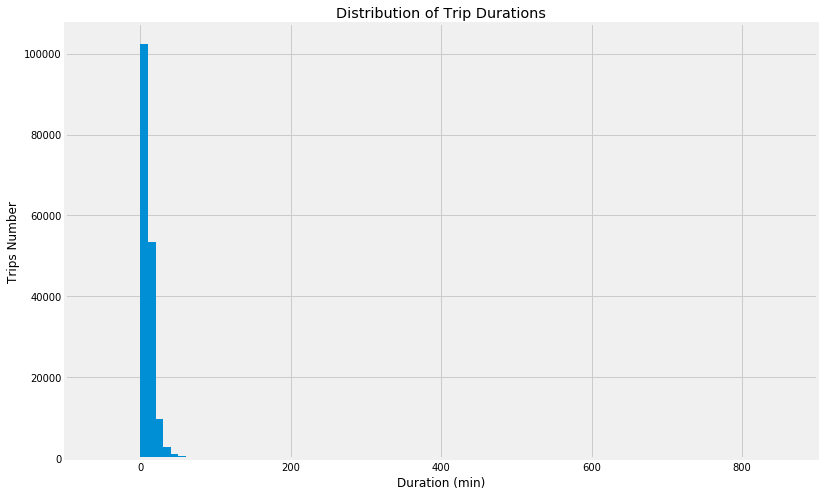

In [89]:
bins = np.arange(0,df.duration_min.max()+10,10)
plt.figure(figsize=[12,8])
plt.hist(data=df,x='duration_min',bins=bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Trips Number')
plt.xlim([-100,900]);

###### Beacause most of  data is concentrated in small region <br>logarthmic scall + clipping X-axis will be used to give better visulaization

In [90]:
#Getting logarithmic min & max
np.log(df['duration_min'].describe())

count    12.051201
mean      2.453528
std       3.269096
min       0.016529
25%       1.680207
50%       2.138103
75%       2.573884
max       7.250730
Name: duration_min, dtype: float64

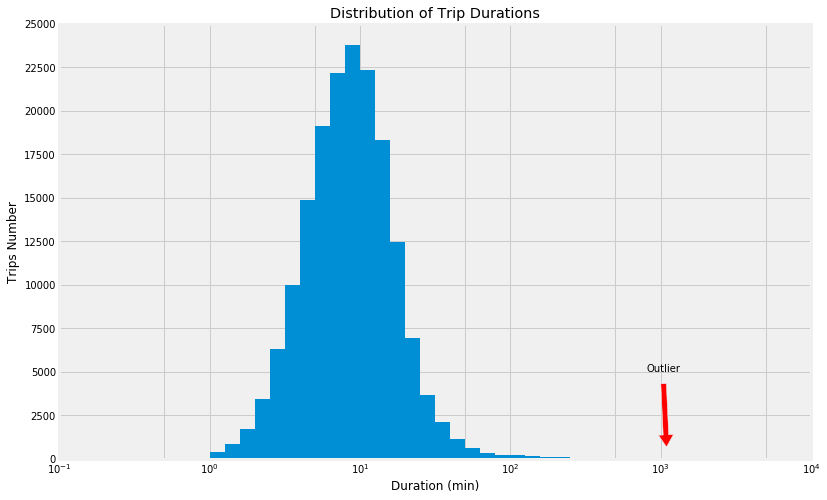

In [91]:
bins = 10 ** np.arange(-2,8+0.1,0.1)
plt.figure(figsize=[12,8])
plt.hist(data=df,x='duration_min',bins=bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Trips Number')
plt.xscale('log')
plt.xlim([0.1,1e4])
plt.xticks([0.1,0.5,1,5,10,5e1,1e2,5e2,1e3,5e3,1e4])
plt.yticks([0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000])
arrow_properties = dict(
    facecolor="red", width=5.5,
    headwidth=15, shrink=0.1)
plt.annotate('Outlier',xy=(1100,200),xytext=(800,5000),arrowprops=arrow_properties);

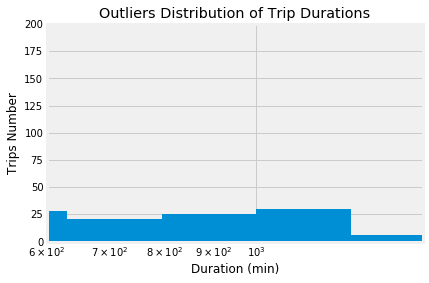

In [92]:
#Zooming in outlier region
bins = 10 ** np.arange(-2,8+0.1,0.1)
plt.hist(data=df,x='duration_min',bins=bins)
plt.title('Outliers Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Trips Number')
plt.xscale('log')
plt.xlim([600,1500])
plt.ylim([0,200]);

##### 1. The average time spent is about  10 min  <br> 2. Distribution is normally distributed as excpected <br> 3. There is an outlier where time spent is about 1000 min for very small number of trips (about 25 trips)

### 3.2 Age Distribution

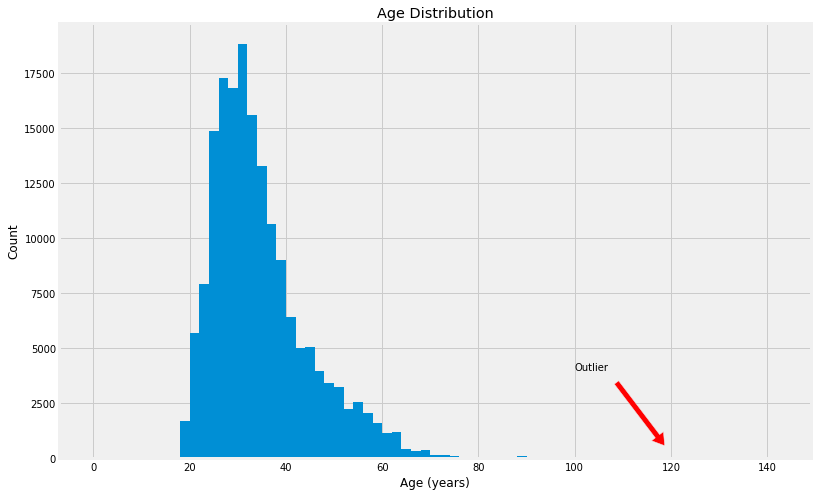

In [93]:
bins = np.arange(0,df.member_age.max()+2,2)
plt.figure(figsize=[12,8])
plt.hist(data=df,x='member_age',bins=bins)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
#plt.xlim([-100,900]);
arrow_properties = dict(
    facecolor="red", width=5.5,
    headwidth=15, shrink=0.1)
plt.annotate('Outlier',xy=(120,200),xytext=(100,4000),arrowprops=arrow_properties);

##### - It seems that average users who makes a ride is about 34 year.<br> - There is outlier with age value 120 year which seems to be strange, a result of that might be random entery may happened when collecting data

### 3.3 Gender & Customer type Distribution

Text(0,0.5,'Number of Users')

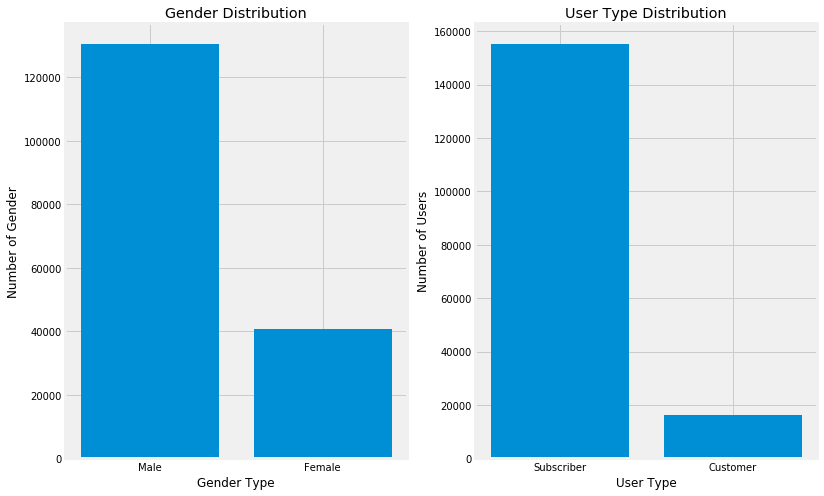

In [94]:
gender_no = df.member_gender.value_counts()
user_no = df.user_type.value_counts()

plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
plt.bar(x=gender_no.keys(),height=gender_no)
plt.title('Gender Distribution')
plt.xlabel('Gender Type')
plt.ylabel('Number of Gender')

plt.subplot(1,2,2)
plt.bar(x=user_no.keys(),height=user_no)
plt.title('User Type Distribution')
plt.xlabel('User Type')
plt.ylabel('Number of Users')

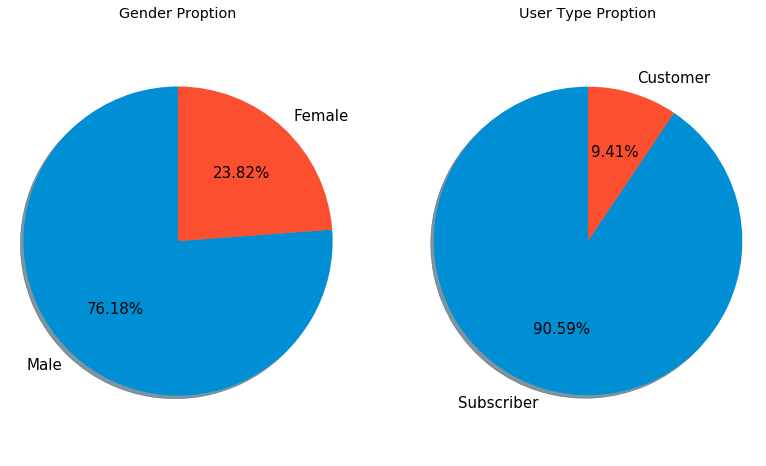

In [95]:
#Same as above, but using proption rather than distribution
plt.figure(figsize=[12,8])

plt.subplot(1,2,1)
plt.pie(gender_no,labels=gender_no.index,startangle=90,autopct = '%1.2f%%',shadow = True,textprops = {"fontsize":15})
plt.title('Gender Proption')
plt.axis('equal')


plt.subplot(1,2,2)
plt.pie(user_no,labels=user_no.index,startangle=90,autopct = '%1.2f%%',shadow = True,textprops = {"fontsize":15})
plt.title('User Type Proption')
plt.axis('equal');

#### 3.3.0 Subscribed No vs Customer No for each gender

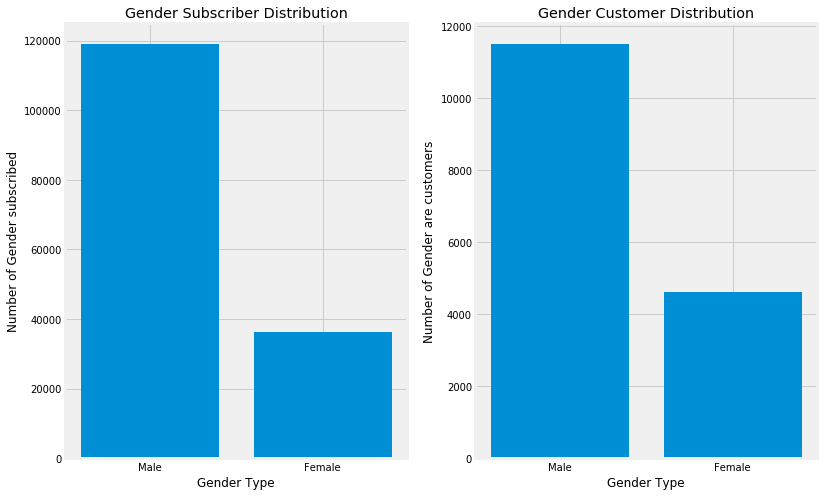

In [96]:
#Subscribed No for each gender
sub_filt = df[df['user_type'] == 'Subscriber']
cust_filt = df[df['user_type'] == 'Customer']
gender_sub_no = sub_filt.member_gender.value_counts()
gender_cust_no = cust_filt.member_gender.value_counts()

plt.figure(figsize=[12,8])

#Subscribed No for each gender
plt.subplot(1,2,1)
plt.bar(x = gender_sub_no.keys(),height=gender_sub_no)
plt.title('Gender Subscriber Distribution')
plt.xlabel('Gender Type')
plt.ylabel('Number of Gender subscribed')

#Customer No for each gender
plt.subplot(1,2,2)
plt.bar(x = gender_cust_no.keys(),height=gender_cust_no)
plt.title('Gender Customer Distribution')
plt.xlabel('Gender Type')
plt.ylabel('Number of Gender are customers');

#### 3.3.1 Gender Proprtion Subscribed vs Customer

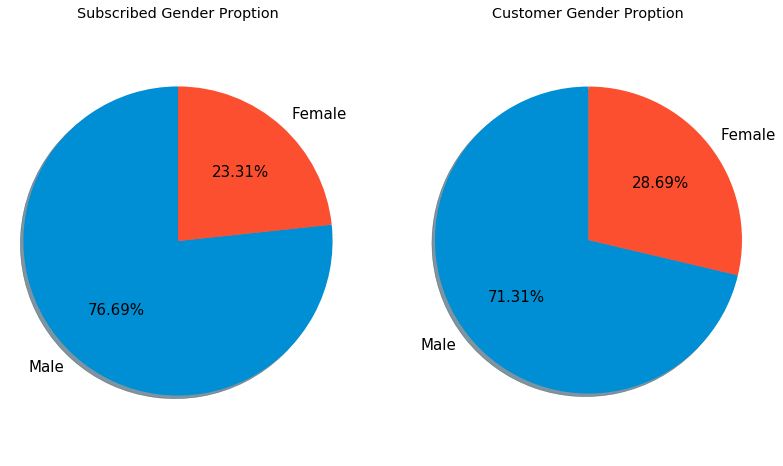

In [97]:


plt.figure(figsize=[12,8])

#Subscribed No for each gender
plt.subplot(1,2,1)
plt.pie(gender_sub_no,labels=gender_sub_no.index,startangle=90,autopct = '%1.2f%%',shadow = True,textprops = {"fontsize":15})
plt.title('Subscribed Gender Proption')
plt.axis('equal')

plt.subplot(1,2,2)
plt.pie(gender_cust_no,labels=gender_cust_no.index,startangle=90,autopct = '%1.2f%%',shadow = True,textprops = {"fontsize":15})
plt.title('Customer Gender Proption')
plt.axis('equal');

### 3.4 Top Ten Start States vs Top Ten End States distribution

In [98]:
top_ten_start_states = df.start_station_name.value_counts()[:10]
top_ten_end_states = df.end_station_name.value_counts()[:10]
base_color = sb.color_palette()[0]

In [99]:
top_ten_start_states_df = top_ten_start_states.to_frame()
top_ten_end_states_df = top_ten_end_states.to_frame()
top_ten_start_states_df = top_ten_start_states_df.reset_index()
top_ten_end_states_df = top_ten_end_states_df.reset_index()

top_ten_start_states_df.rename(columns={'index':'start_station_name','start_station_name':'count'},inplace=True)
top_ten_end_states_df.rename(columns={'index':'end_station_name','end_station_name':'count'},inplace=True)

In [100]:
top_ten_end_states_df

,end_station_name,count
0,San Francisco Caltrain Station 2 (Townsend St...,4584
1,Market St at 10th St,3636
2,Montgomery St BART Station (Market St at 2nd St),3375
3,San Francisco Ferry Building (Harry Bridges Pl...,3084
4,San Francisco Caltrain (Townsend St at 4th St),2833
5,Powell St BART Station (Market St at 4th St),2811
6,Berry St at 4th St,2737
7,The Embarcadero at Sansome St,2309
8,Steuart St at Market St,2230
9,Powell St BART Station (Market St at 5th St),2111


In [101]:
top_ten_start_states_df

,start_station_name,count
0,Market St at 10th St,3576
1,San Francisco Caltrain Station 2 (Townsend St...,3370
2,Berry St at 4th St,2910
3,Montgomery St BART Station (Market St at 2nd St),2643
4,Powell St BART Station (Market St at 4th St),2576
5,San Francisco Caltrain (Townsend St at 4th St),2551
6,San Francisco Ferry Building (Harry Bridges Pl...,2495
7,Howard St at Beale St,2188
8,Steuart St at Market St,2170
9,Powell St BART Station (Market St at 5th St),2081


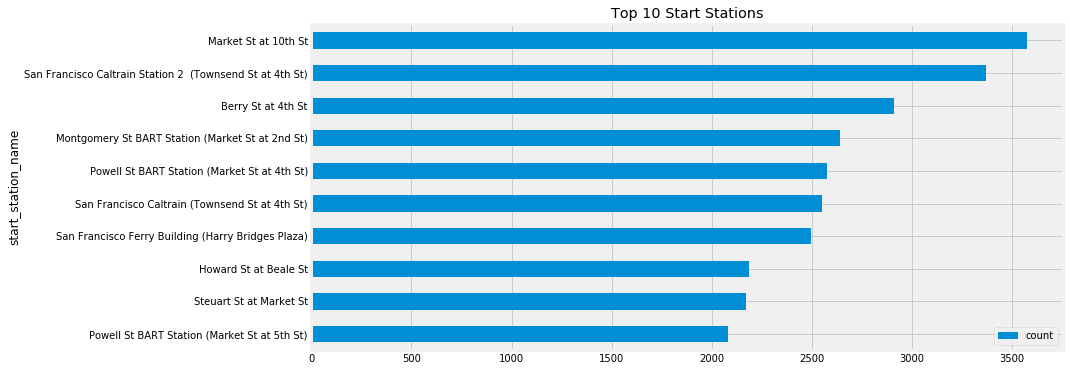

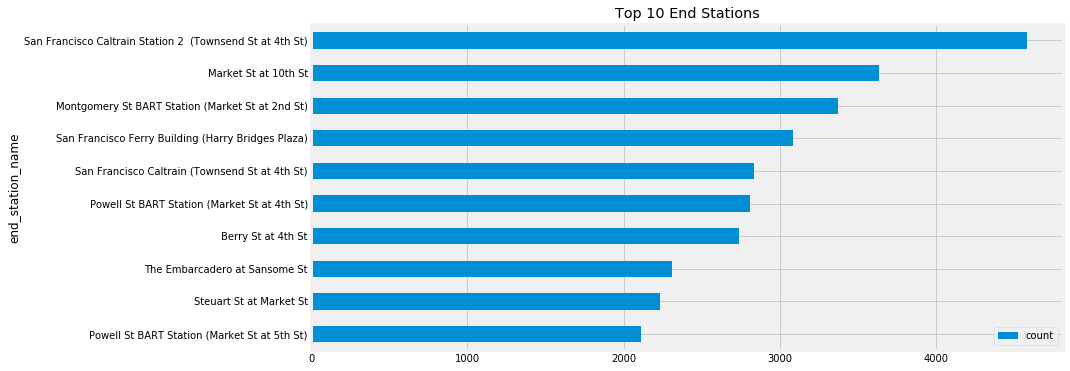

In [102]:
ax=top_ten_start_states_df.plot.barh(y='count',x='start_station_name',color=base_color,title='Top 10 Start Stations',figsize=(12,6))
ax.invert_yaxis()


ax1=top_ten_end_states_df.plot.barh(y='count',x='end_station_name',color=base_color,title='Top 10 End Stations',figsize=(12,6))
ax1.invert_yaxis()

### 3.5 Day Start & Hour start count

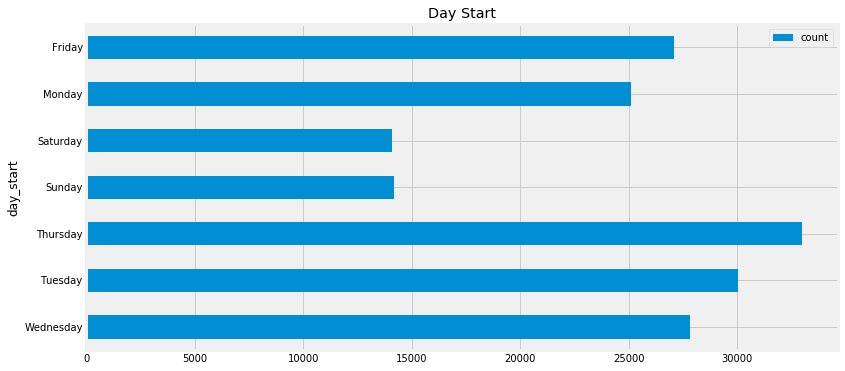

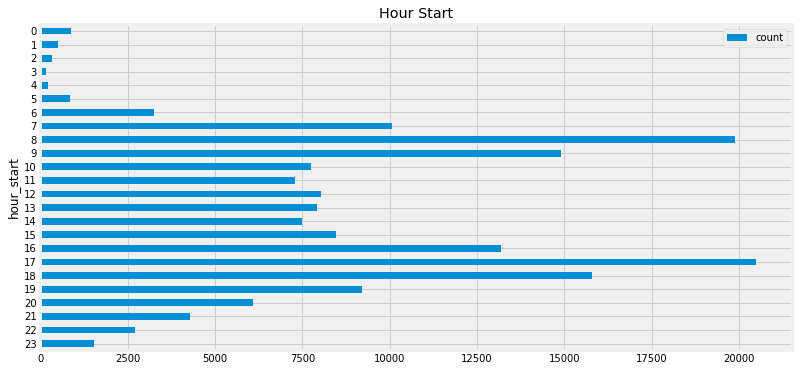

In [103]:
#Plotting count of bike rides in both Day Starts & Time Start

day_start_avg_dur = (df.groupby('day_start').size()).to_frame().reset_index()
day_start_avg_dur.rename(columns = {0:'count'},inplace=True)
day_start_avg_dur
hour_start_avg_dur = (df.groupby('hour_start').size()).to_frame().reset_index()
hour_start_avg_dur.rename(columns = {0:'count'},inplace=True)
hour_start_avg_dur

ax=day_start_avg_dur.plot.barh(y='count',x='day_start',color=base_color,title='Day Start',figsize=(12,6))
ax.invert_yaxis()


ax1=hour_start_avg_dur.plot.barh(y='count',x='hour_start',color=base_color,title='Hour Start',figsize=(12,6))
ax1.invert_yaxis()

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Plotting the trip duration distribution without transformation was misleading at which the whole graph was compressed in a narrow region. So a **log** transformation was made to expand graph for better visualization. An oulier is detected with a value about 1000 min duration which happened for about 25 trips. 

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the user age, gender, user type, start stations, end stations most of the results were logic except for age distribution (years) there was an outlier found with value about 118 years.<br> For better intuation we made two new columns to work on "member_age" rather than "birth_date"  &  "duration" in min  rather than  "duration" in sec

## 4. Bivariate Exploration

### 4.1 Age & Duration correlation

In [104]:
df[['member_age','duration_min']].describe()

,member_age,duration_min
count,171305.000000,171305.000000
mean,34.160649,11.629300
std,10.116083,26.287562
min,18.000000,1.016667
25%,27.000000,5.366667
50%,32.000000,8.483333
75%,39.000000,13.116667
max,141.000000,1409.133333


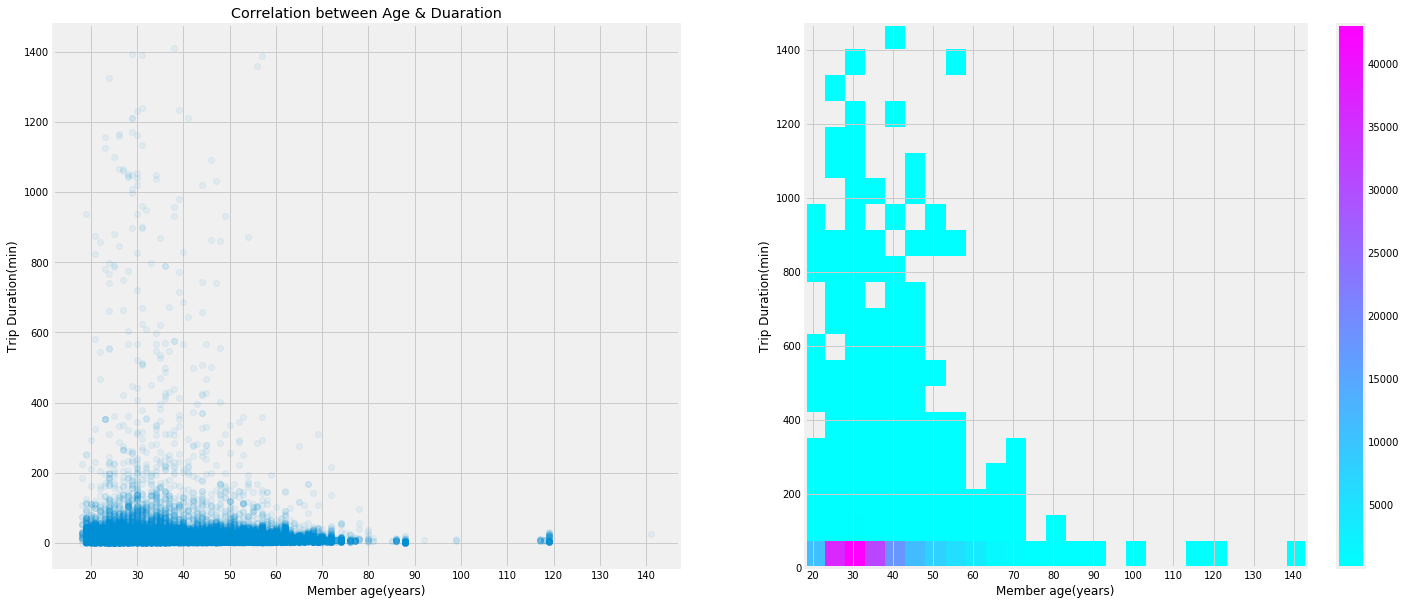

In [105]:
plt.figure(figsize=[22,10])

plt.subplot(1,2,1)
sb.regplot(data=df,x='member_age',y='duration_min',fit_reg=False,scatter_kws={'alpha': 1/15})
plt.xticks([20,30,40,50,60,70,80,90,100,110,120,130,140])
plt.title('Correlation between Age & Duaration')
plt.xlabel('Member age(years)')
plt.ylabel('Trip Duration(min)')

plt.subplot(1,2,2)
bins_x = np.arange(18,141+5,5)
bins_y = np.arange(1,1409+70,70)

plt.hist2d(data=df,x='member_age',y='duration_min',cmin=0.5,cmap='cool',bins=[bins_x,bins_y])
plt.xticks([20,30,40,50,60,70,80,90,100,110,120,130,140])
plt.colorbar()
plt.xlabel('Member age(years)')
plt.ylabel('Trip Duration(min)');

##### It is obvious from both graphs that most frequent users age between 25 & 40 years, at which higher durations occurred with younger members

### 4.2 Gender & Duaration

(array([0, 1]), <a list of 2 Text xticklabel objects>)

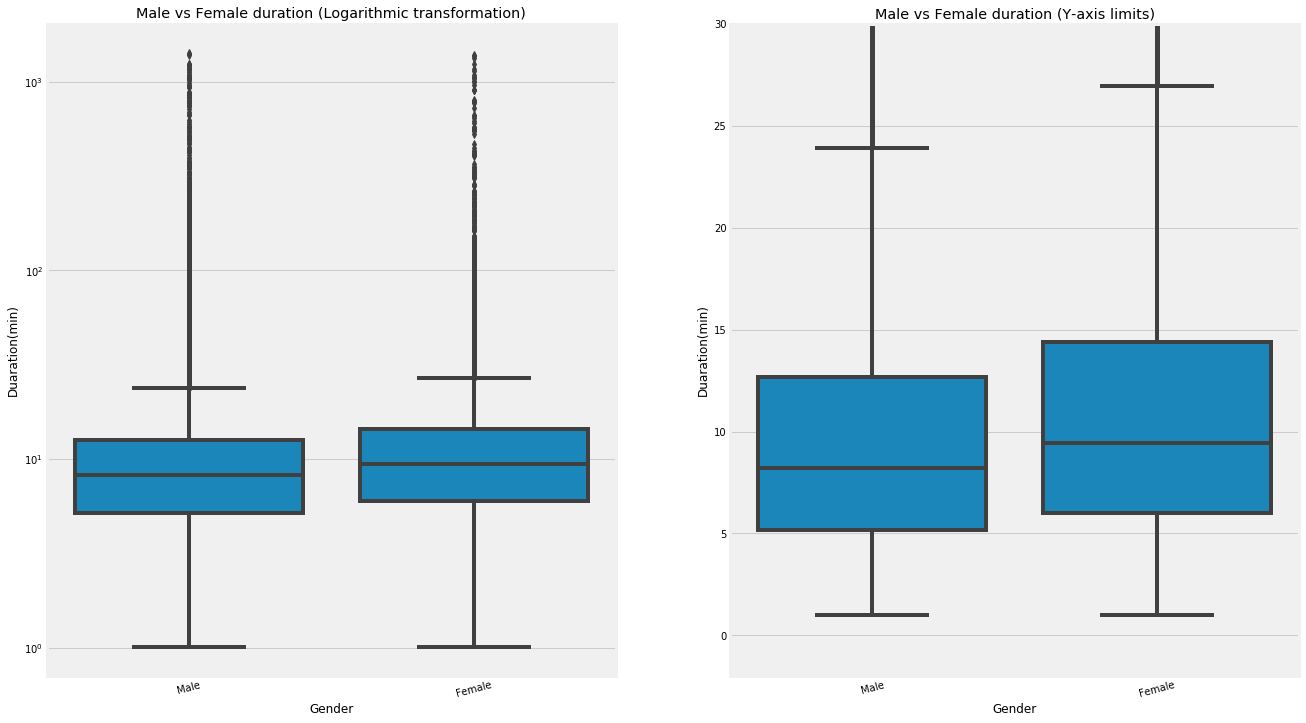

In [106]:
plt.figure(figsize=[20,12]) 


plt.subplot(1,2,1)
plt.title('Male vs Female duration (Logarithmic transformation)')
sb.boxplot(data=df,x='member_gender',y='duration_min',color=base_color)
plt.yscale('log')
plt.xlabel('Gender')
plt.ylabel('Duaration(min)')
plt.xticks(rotation=15)

plt.subplot(1,2,2)
plt.title('Male vs Female duration (Y-axis limits)')
sb.boxplot(data=df,x='member_gender',y='duration_min',color=base_color)
plt.ylim([-2, 30])
plt.xlabel('Gender')
plt.ylabel('Duaration(min)')
plt.xticks(rotation=15)

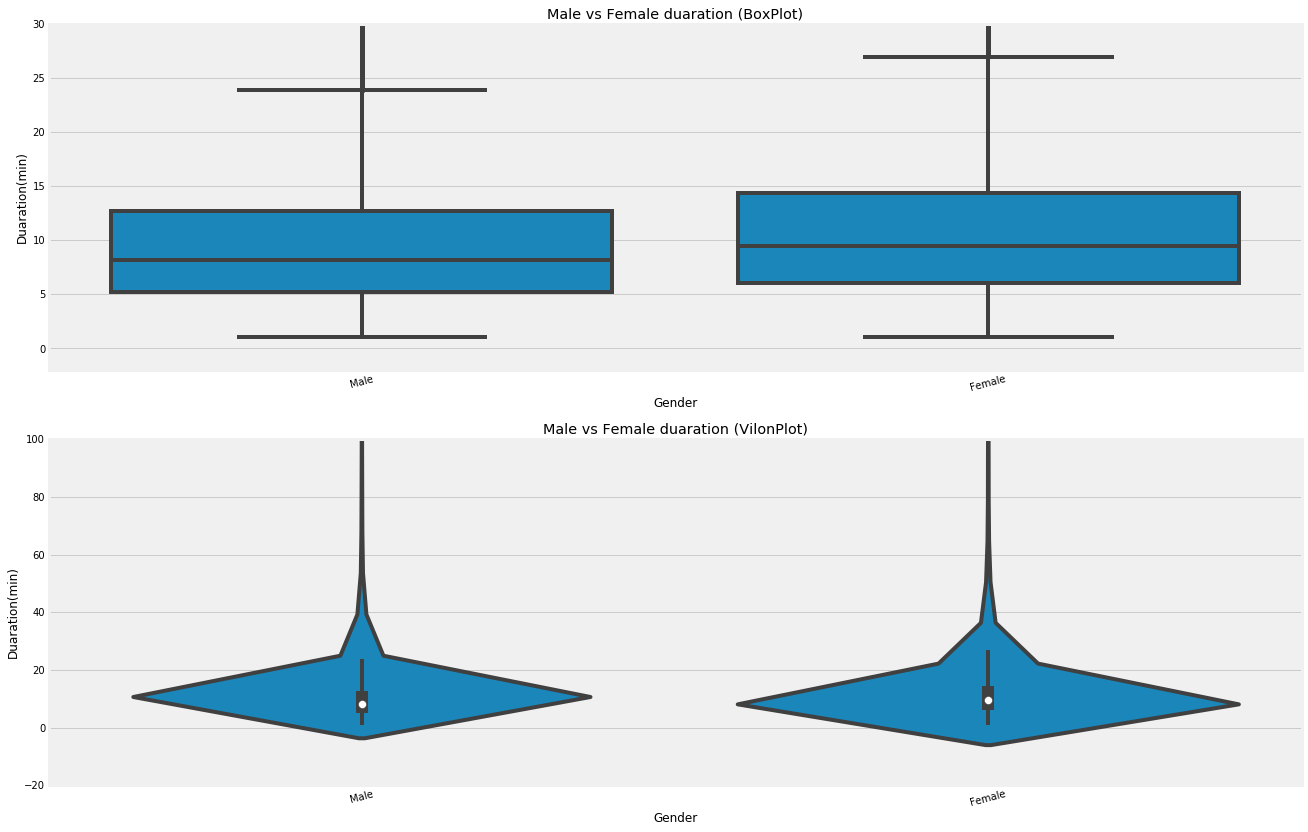

In [46]:
plt.figure(figsize=[20,14]) 
plt.title('Male vs Female duration')

plt.subplot(2,1,1)
plt.title('Male vs Female duaration (BoxPlot)')
sb.boxplot(data=df,x='member_gender',y='duration_min',color=base_color)
plt.ylim([-2, 30])
plt.xlabel('Gender')
plt.ylabel('Duaration(min)')
plt.xticks(rotation=15)

plt.subplot(2,1,2)
plt.title('Male vs Female duaration (VilonPlot)')
sb.violinplot(data=df,x='member_gender',y='duration_min',color=base_color)
plt.ylim([-20, 100])
plt.xlabel('Gender')
plt.ylabel('Duaration(min)')
plt.xticks(rotation=15);

In [47]:
df.groupby('member_gender').mean()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,member_age,hour_start
member_gender,,,,,,,,,,,,
Female,778.872761,138.107046,37.780751,-122.357255,136.301630,37.780915,-122.356612,4397.113565,1985.776302,12.981213,33.223698,13.216076
Male,672.394851,138.894529,37.767464,-122.349906,136.305908,37.767677,-122.349541,4507.615885,1984.546383,11.206581,34.453617,13.525172


##### - From Box Plot although total bumber of males > total number of females  in Univariant exoplration ,  Female avg duration > Male avg duration  in Multivariamt exoplration<br> <br> - Logarthmic transformation was used on y-axis as whole box was concentrated in a very narrow region , Other method can be used by limiting y-axis<br> <br> -  From Vilon Plot, both Males & Females most "duaration" distribution from 0 up to abot 20 min. If we look closer the region from 20 to 40 min in Female is higher.

### 4.3 User type & duration

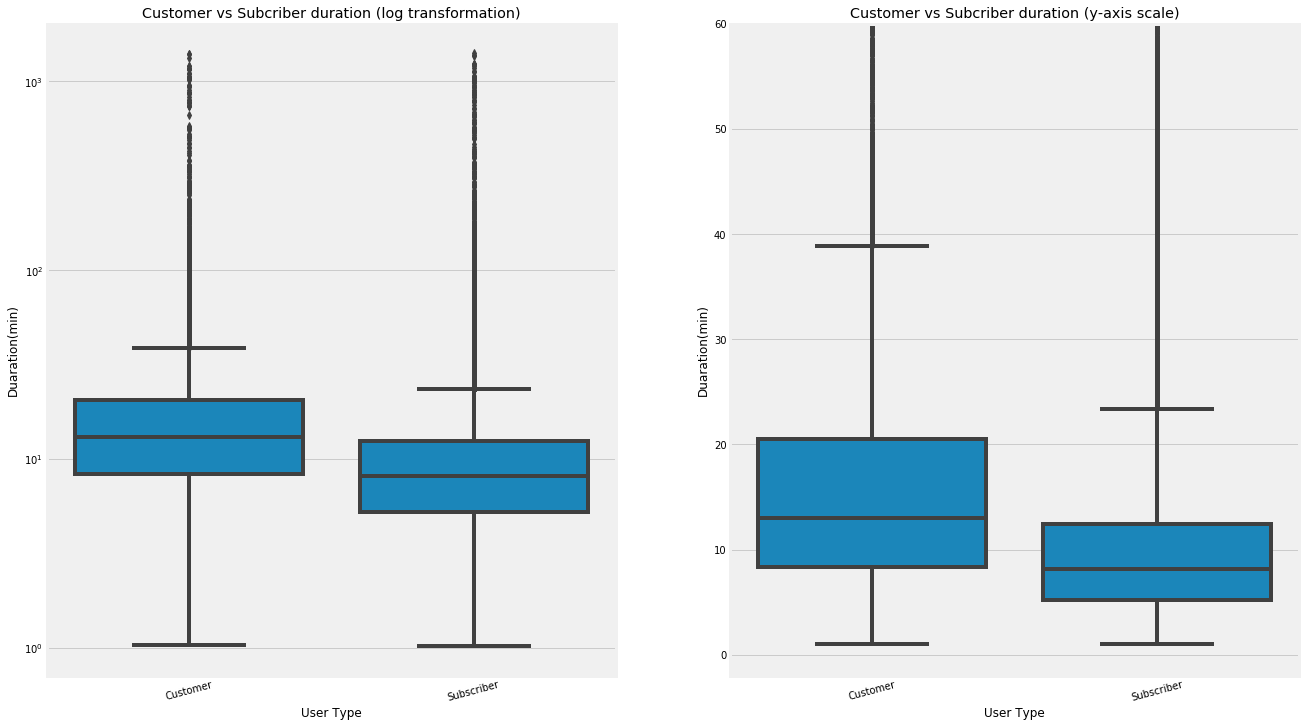

In [48]:
plt.figure(figsize=[20,12]) 

plt.subplot(1,2,1)
plt.title('Customer vs Subcriber duration (log transformation)')

sb.boxplot(data=df,x='user_type',y='duration_min',color=base_color)
plt.yscale('log')
plt.xlabel('User Type')
plt.ylabel('Duaration(min)')
plt.xticks(rotation=15)

plt.subplot(1,2,2)
plt.title('Customer vs Subcriber duration (y-axis scale)')

sb.boxplot(data=df,x='user_type',y='duration_min',color=base_color)
plt.ylim([-2, 60])
plt.xlabel('User Type')
plt.ylabel('Duaration(min)')
plt.xticks(rotation=15);

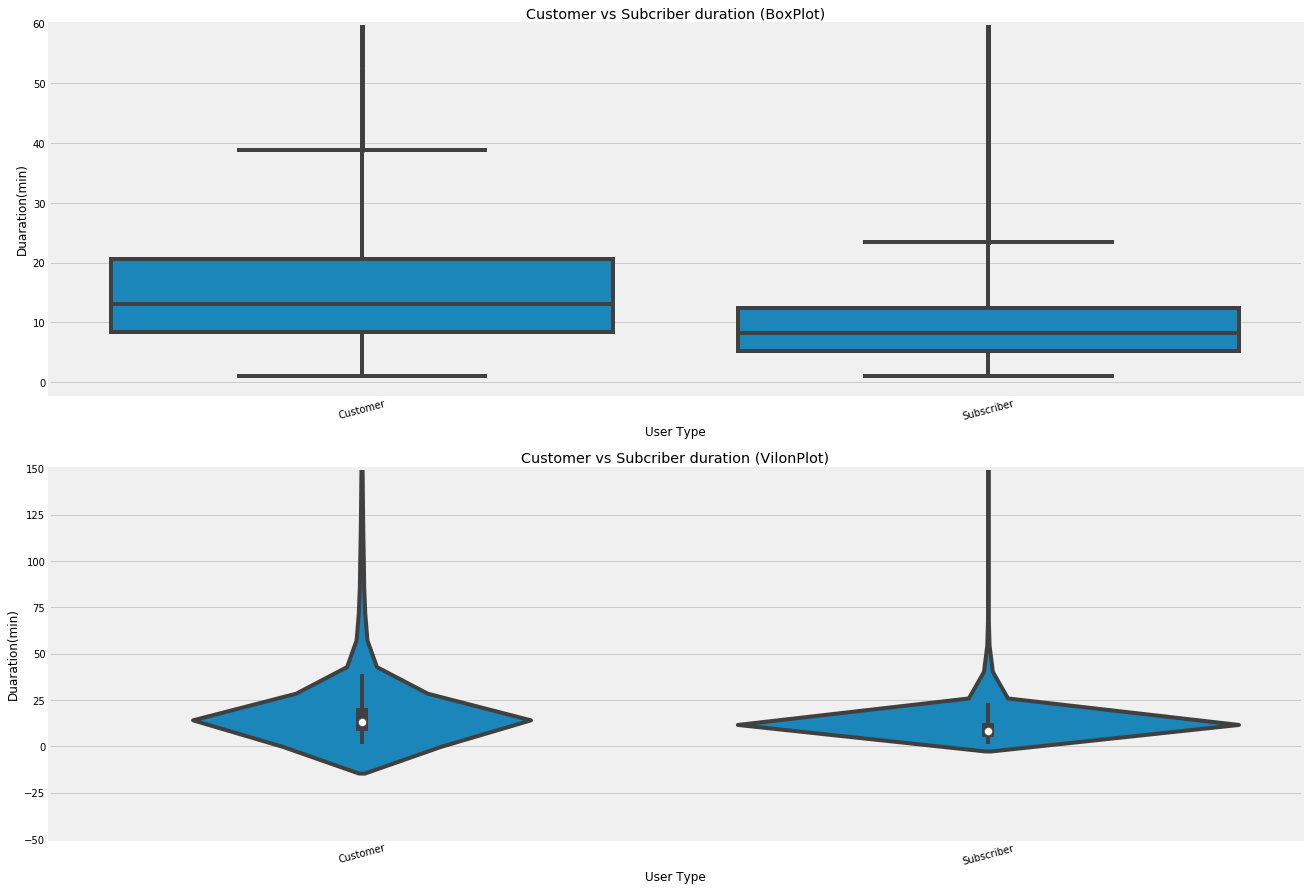

In [49]:
plt.figure(figsize=[20,15])

plt.subplot(2,1,1)
plt.title('Customer vs Subcriber duration (BoxPlot)')

sb.boxplot(data=df,x='user_type',y='duration_min',color=base_color)
plt.ylim([-2, 60])
plt.xlabel('User Type')
plt.ylabel('Duaration(min)')
plt.xticks(rotation=15)

plt.subplot(2,1,2)
plt.title('Customer vs Subcriber duration (VilonPlot)')
sb.violinplot(data=df,x='user_type',y='duration_min',color=base_color)
plt.ylim([-50, 150])
plt.xlabel('User Type')
plt.ylabel('Duaration(min)')
plt.xticks(rotation=15);

##### -  From Boxplots, It is obvious that "Customer" user mean duration > “Subscriber" user mean duration  <br> <br> - From Villon plots, it is obvious in range 0 to 20 min "Subscriber" user distribution is much more than "Customer" user.<br><br> - On the other hand, in range 25 - 40 min "Customer" user distribution is much more than "Subscriber" user. <br> <br> - Logarithmic transformation was used on y-axis as whole box was concentrated in a very narrow region, other method can be used by limiting y-axis.

### 4.4 Day Start & Hour Start

In [50]:
hour_counts = df.groupby(['day_start','hour_start']).size()
hour_counts = hour_counts.reset_index(name = 'count')
hour_counts = hour_counts.pivot(index = 'hour_start', columns = 'day_start', values = 'count')
col_names = ['Monday','Sunday','Tuesday','Wednesday','Thursday','Friday','Saturday']
hour_counts = hour_counts.reindex(columns=col_names)
hour_counts.head()

day_start,Monday,Sunday,Tuesday,Wednesday,Thursday,Friday,Saturday
hour_start,,,,,,,
0,96,148,78,82,118,139,208
1,43,96,53,44,41,78,154
2,37,87,32,28,24,59,73
3,18,33,17,13,20,28,23
4,35,20,30,26,40,42,22


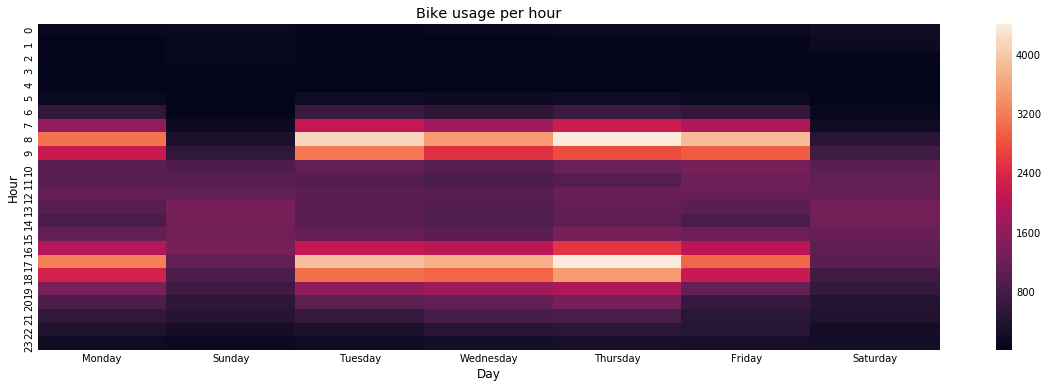

In [51]:
plt.figure(figsize=(18, 6))
sb.heatmap(hour_counts)
plt.title('Bike usage per hour')
plt.ylabel('Hour')
plt.xlabel('Day');

##### It is obvious here that most users take bikes early in the morning & at evening after work

### 4.5 Start Day & Duration

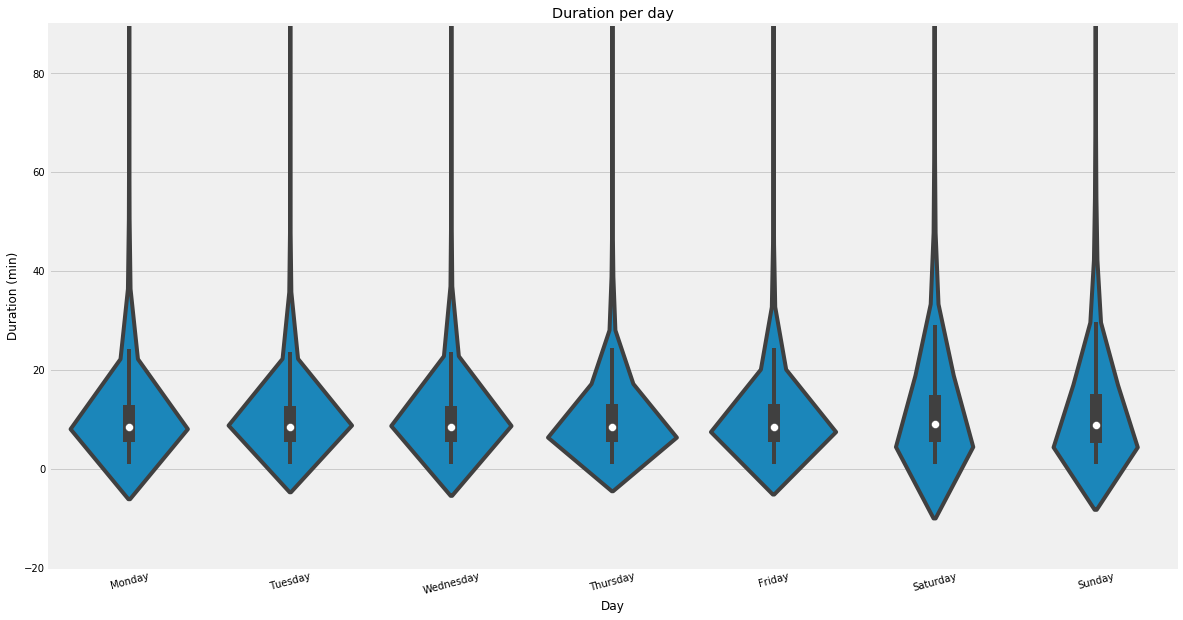

In [52]:
plt.figure(figsize=[18,10])

sb.violinplot(data=df,x='day_start',y='duration_min',color=base_color,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylim(-20,90)
plt.title('Duration per day')
plt.ylabel('Duration (min)')
plt.xlabel('Day')
plt.xticks(rotation=15);

##### - It seems that on weekends "Saturday" & "Sunday" more rides are taken which logic. <br> <br> - What is strange that in same duration range 0 to 20 min work days have much larger distribution in duration.

## 5. Multivariate Exploration

### 5.1 Age & Gender with Duration distribution

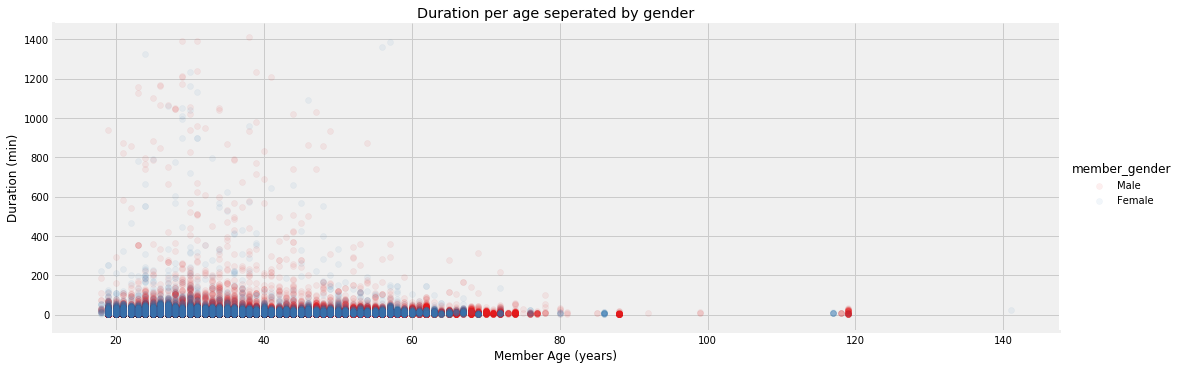

In [53]:
g = sb.FacetGrid(data=df,hue='member_gender',palette='Set1',hue_order=['Male','Female'],height=5,aspect=3)
g = g.map(plt.scatter,'member_age','duration_min',alpha=1/15)
g.add_legend()
plt.title('Duration per age seperated by gender')
plt.xlabel("Member Age (years)")
plt.ylabel('Duration (min)');

##### - It seems that males are most dominant in duration up to abot 100 min with age range 20-60 years.<br> <br> - With age range 20-60 years, females appeares more in higher duration which explains from Mulivariate Expolration why females have higher avg duration.

### 5.2 Age & User Type with Duration distribution

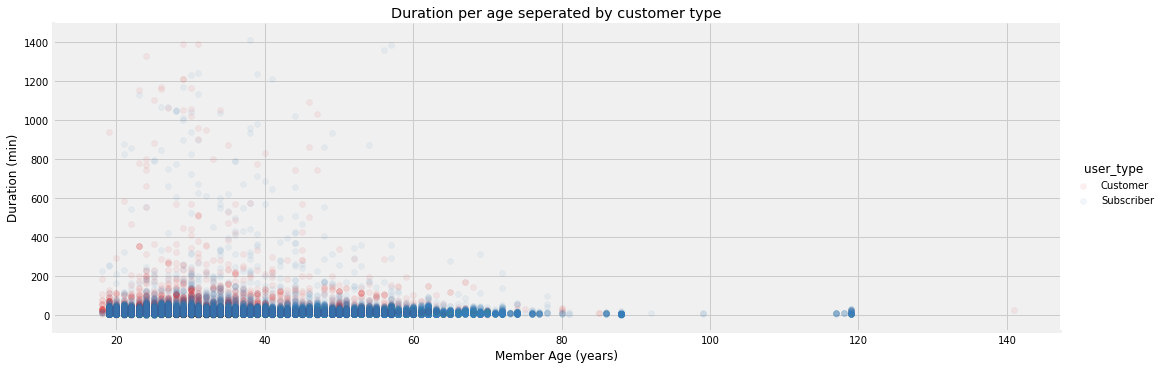

In [54]:
g = sb.FacetGrid(data=df,hue='user_type',palette='Set1',hue_order=['Customer','Subscriber'],height=5,aspect=3)
g = g.map(plt.scatter,'member_age','duration_min',alpha=1/15)
g.add_legend()
plt.title('Duration per age seperated by customer type')
plt.xlabel("Member Age (years)")
plt.ylabel('Duration (min)');

##### - It seems that subscriber members are much more than Customers with age range 20-70 years.<br><br> - At about 18 years old. it seems that there almost no Subscribers which is somehow logic for teenagers to just rent the bikes.

### 5.3 Age & Day Start with Duration distribution

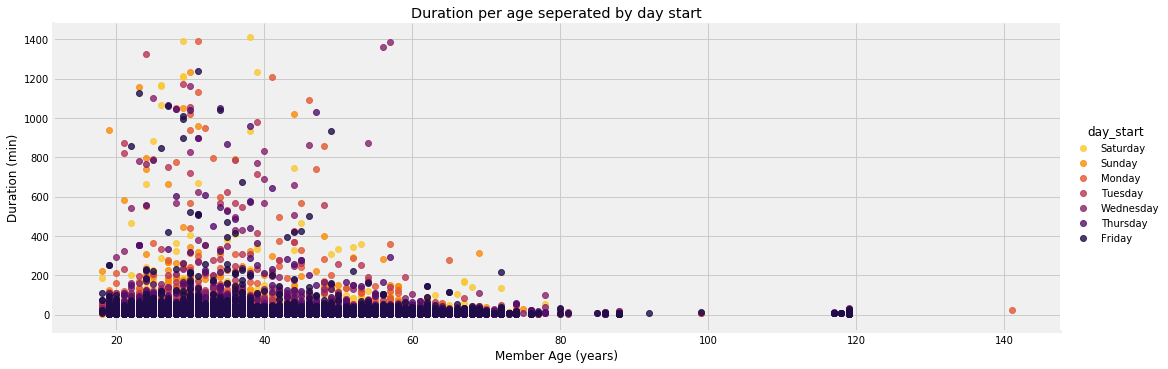

In [55]:
g = sb.FacetGrid(data=df,hue='day_start',palette='inferno_r',hue_order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'],height=5,aspect=3)
g = g.map(sb.regplot,'member_age','duration_min',fit_reg=False)
g.add_legend()
plt.title('Duration per age seperated by day start')
plt.xlabel("Member Age (years)")
plt.ylabel('Duration (min)');

##### - This explains that the most day members use bikes is Friday then comes Saturday, which is logic as they are the weekends.

### 5.4 Day Start & Gender with Duration distribution

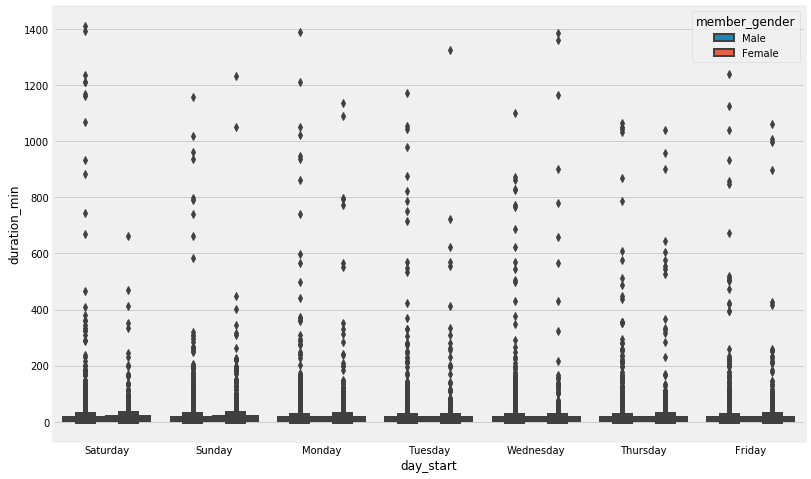

In [56]:
plt.figure(figsize=[12,8])
sb.boxplot(data = df, x = 'day_start', y = 'duration_min', hue = 'member_gender', order = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']);

##### It seems that a logarithmic transformation is needed

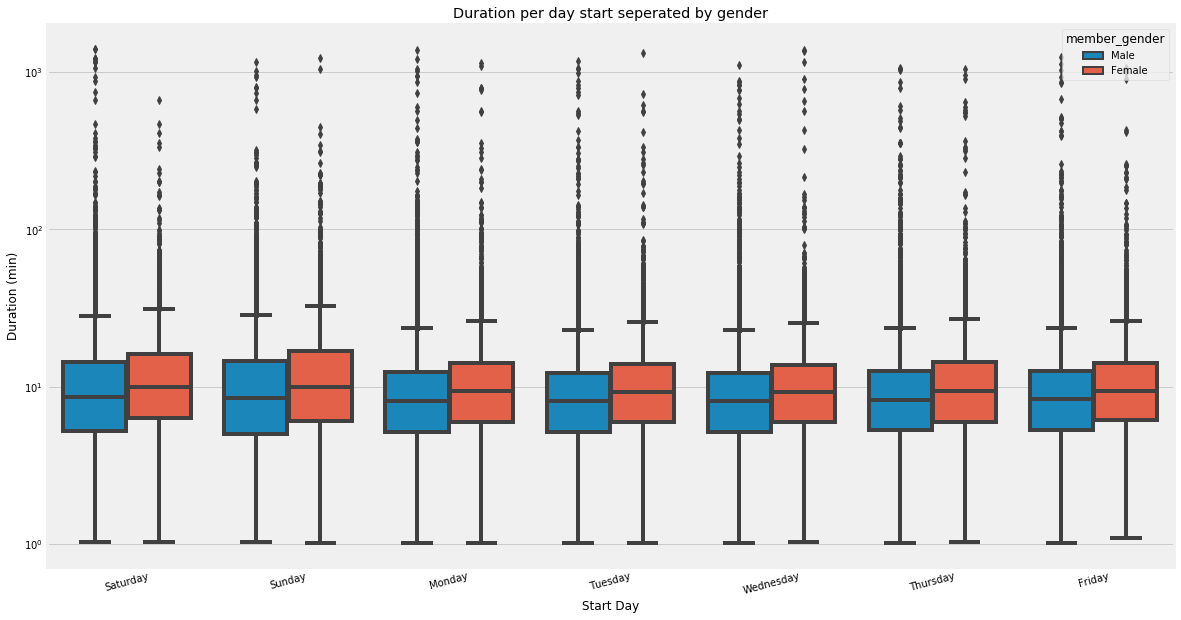

In [57]:
plt.figure(figsize=[18,10])
sb.boxplot(data = df, x = 'day_start', y = 'duration_min', hue = 'member_gender', order = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.yscale('log')
plt.xticks(rotation=15)
plt.title('Duration per day start seperated by gender')
plt.xlabel('Start Day')
plt.ylabel('Duration (min)');

##### - In all days, females have high avg duration than males.

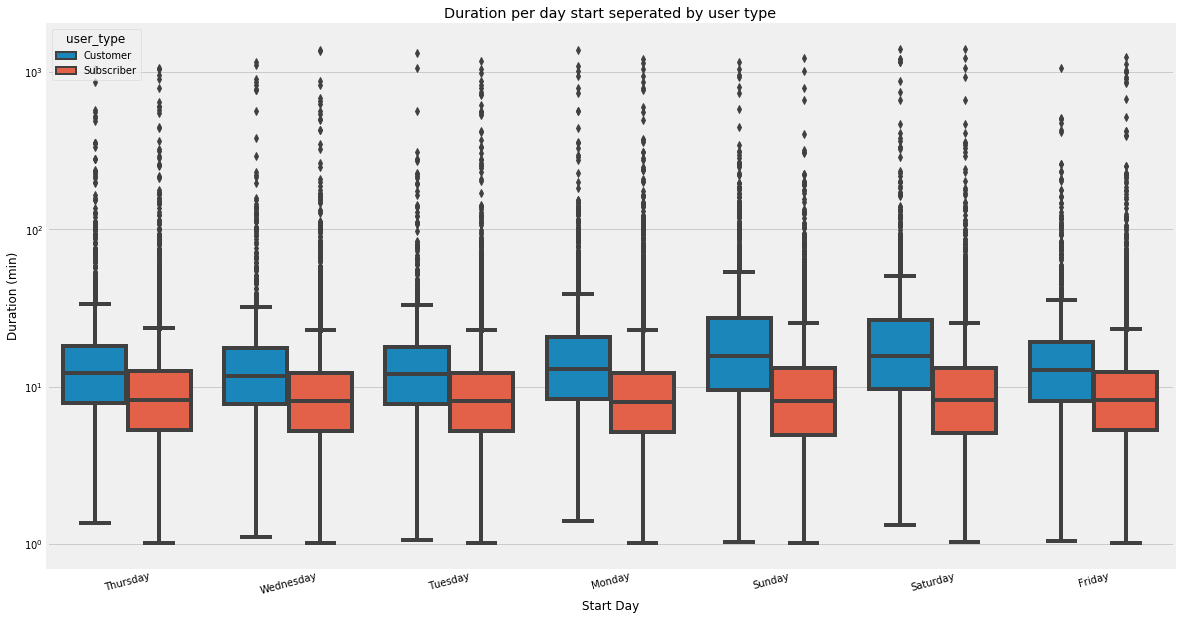

In [58]:
plt.figure(figsize=[18,10])
sb.boxplot(data = df, x = 'day_start', y = 'duration_min', hue = 'user_type')
plt.yscale('log')
plt.xticks(rotation=15)
plt.title('Duration per day start seperated by user type')
plt.xlabel('Start Day')
plt.ylabel('Duration (min)');

##### - Customer users make more duration than Subscriber users in all days.<br><br> - Max duration day is Sunday for Customers

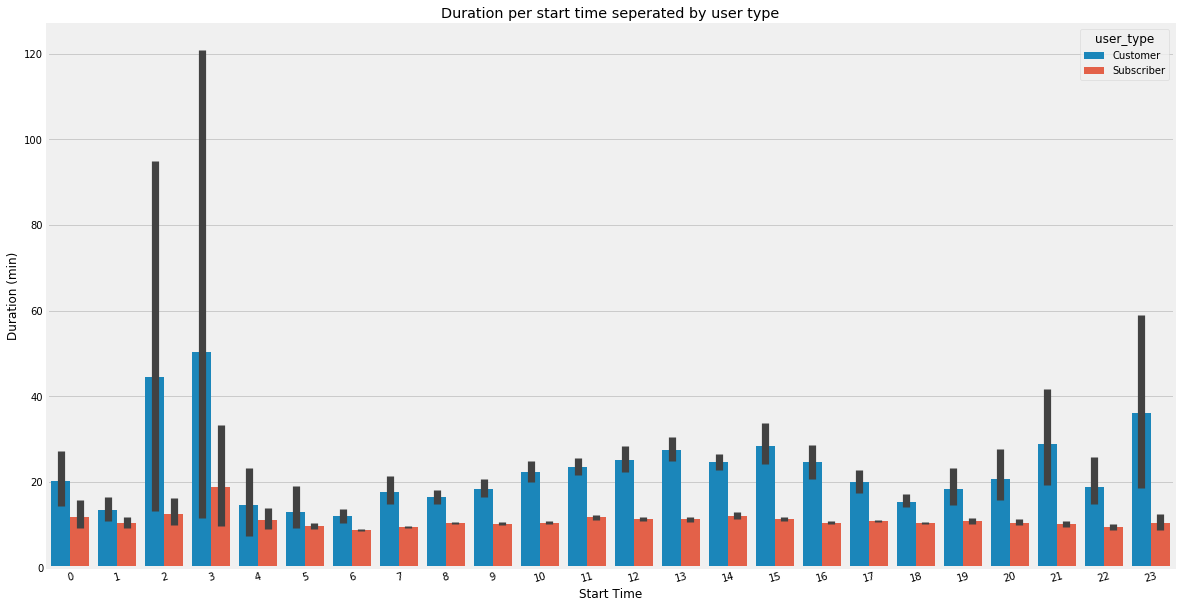

In [59]:
plt.figure(figsize=[18,10])
sb.barplot(data = df, x = 'hour_start', y = 'duration_min', hue = 'user_type')
plt.xticks(rotation=15)
plt.title('Duration per start time seperated by user type')
plt.xlabel('Start Time')
plt.ylabel('Duration (min)');

##### - Customers make more duration in all starting times than Subscribers.<br><br> - For Customers, most dominant starting times are 2 & 3 pm with greatest probability of outliers can occuer reaching at 3 pm an outlier with value 120 min.<br><br> - For Customers, least dominant starting times are 5 & 6 pm.<br><br> - For Subscribers, most dominant starting times is 3 pm.<br><br> - For Subscribers, least dominant starting times are 5 & 6 pm.

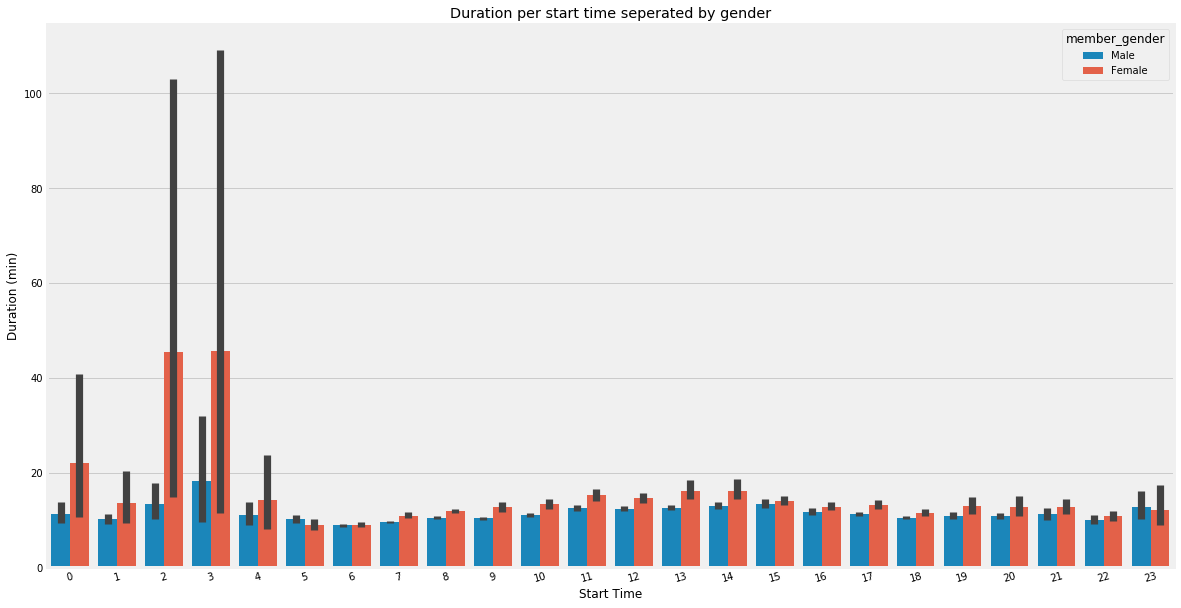

In [60]:
plt.figure(figsize=[18,10])
sb.barplot(data = df, x = 'hour_start', y = 'duration_min', hue = 'member_gender')
plt.xticks(rotation=15)
plt.title('Duration per start time seperated by gender')
plt.xlabel('Start Time')
plt.ylabel('Duration (min)');

##### - Females make more duration in all starting times than Males except at 5 & 23.<br><br> - For Females most dominant starting times are 2 & 3 pm with greatest probability of outliers can occuer reaching at 3 pm an outlier with value  about 110 min..<br><br> - For Females, least dominant starting times are 5 & 6 pm.<br><br> - For Males, most dominant starting times is 3 pm.<br><br> - For Males, least dominant starting times are 6 & 7 pm.